<a href="https://colab.research.google.com/github/rivandimuhammads/MachineLearning/blob/main/UTS_SLO_KELOMPOK10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Untuk mengimport file dari folder gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Untuk membaca dataset training dari file yang telah tersimpan di folder gdrive. Nama file dataset training adalah mnist_train.csv (sesuai nama dataset train yang di save di gdrive)

In [ ]:
import pandas as pd
data_train=pd.read_csv("gdrive/My Drive/Colab Notebooks/mnist_train.csv")
print(data_train)

       5  0  0.1  0.2  0.3  0.4  ...  0.612  0.613  0.614  0.615  0.616  0.617
0      0  0    0    0    0    0  ...      0      0      0      0      0      0
1      4  0    0    0    0    0  ...      0      0      0      0      0      0
2      1  0    0    0    0    0  ...      0      0      0      0      0      0
3      9  0    0    0    0    0  ...      0      0      0      0      0      0
4      2  0    0    0    0    0  ...      0      0      0      0      0      0
...   .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
59994  8  0    0    0    0    0  ...      0      0      0      0      0      0
59995  3  0    0    0    0    0  ...      0      0      0      0      0      0
59996  5  0    0    0    0    0  ...      0      0      0      0      0      0
59997  6  0    0    0    0    0  ...      0      0      0      0      0      0
59998  8  0    0    0    0    0  ...      0      0      0      0      0      0

[59999 rows x 785 columns]


Untuk membaca dataset test dari file yang telah tersimpan di folder gdrive. Nama file dataset training adalah mnist_test.csv (sesuai nama dataset test di gdrive)

In [ ]:
import pandas as pd
data_test=pd.read_csv("gdrive/My Drive/Colab Notebooks/mnist_test.csv")
print(data_test)

      7  0  0.1  0.2  0.3  0.4  ...  0.662  0.663  0.664  0.665  0.666  0.667
0     2  0    0    0    0    0  ...      0      0      0      0      0      0
1     1  0    0    0    0    0  ...      0      0      0      0      0      0
2     0  0    0    0    0    0  ...      0      0      0      0      0      0
3     4  0    0    0    0    0  ...      0      0      0      0      0      0
4     1  0    0    0    0    0  ...      0      0      0      0      0      0
...  .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
9994  2  0    0    0    0    0  ...      0      0      0      0      0      0
9995  3  0    0    0    0    0  ...      0      0      0      0      0      0
9996  4  0    0    0    0    0  ...      0      0      0      0      0      0
9997  5  0    0    0    0    0  ...      0      0      0      0      0      0
9998  6  0    0    0    0    0  ...      0      0      0      0      0      0

[9999 rows x 785 columns]


Untuk mendefinisikan label berdasarkan pixel yang ada pada image yaitu 28x28 menggunakan library matplotlib yang dapat menghasilkan plot dengan kualitas tinggi dalam berbagai format dan numpy sebagai pembentuk N-dimensional array

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "gdrive/My Drive/Colab Notebooks/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_data[test_data==255]
test_data.shape

(10000, 785)

Mapping dataset dari range 0 sampai dengan 255 menjadi interval 0.01 sampai 1 dengan mengalikan tiap pixel dengan 0.99/25 ditambah dengan 0.01. Input 0 dihindari supaya selalu terjadi weight update.

In [ ]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

Untuk memetakan label dalam bentuk array dalam *one-hot representation*

In [ ]:
import numpy as np

lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


Untuk memetakan label dalam bentuk array dengan nilai antara 0.01 dan 0.99


In [ ]:
lr = np.arange(no_of_different_labels)

# transform labels menjadi one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

Untuk melihat data train yang telah direshape ke ukuran 28x28

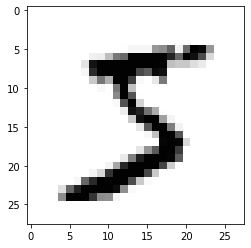

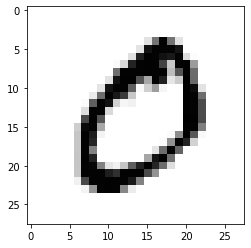

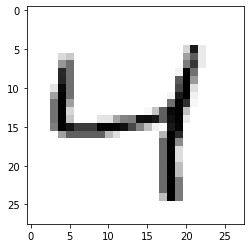

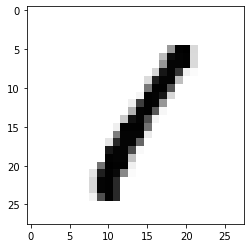

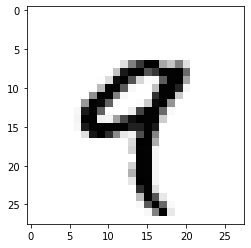

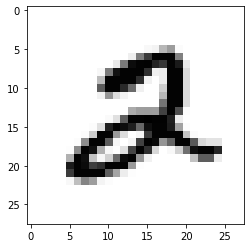

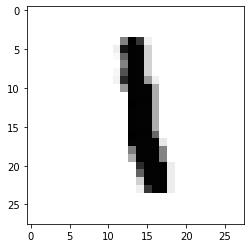

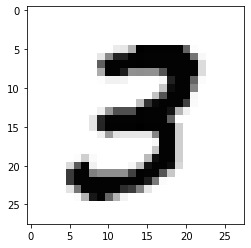

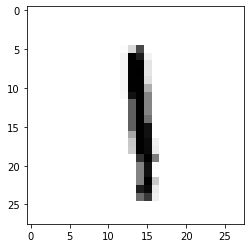

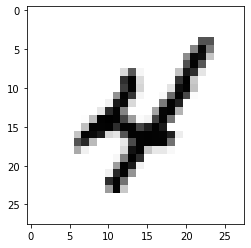

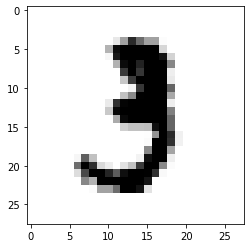

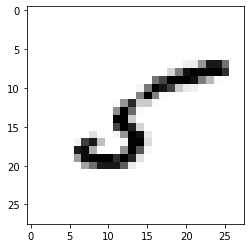

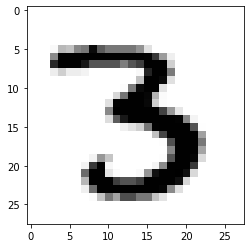

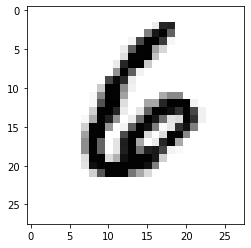

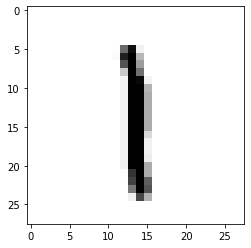

In [ ]:
for i in range(15):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

Untuk melakukan klasifikasi dataset dengan neural network menggunakan fungsi aktivasi sigmoid. Inisialisasi weight dilakukan dengan menggenerasi nilai acak dengan truncated distribution.


In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)


class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ 
        A method to initialize the weight 
        matrices of the neural network
        """
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                                         self.no_of_hidden_nodes))
        
    
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can 
        be tuple, list or ndarray
        """
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # memperbaharui weights:
        tmp = output_errors * output_network \
              * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T)
        self.who += tmp


        # mengkalkulasikan hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # memperbaharui weights:
        tmp = hidden_errors * output_hidden * \
              (1.0 - output_hidden)
        self.wih += self.learning_rate \
                          * np.dot(tmp, input_vector.T)
        

        
    
    def run(self, input_vector):
        # input_vector bisa berupa tuple, list atau ndarray
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm    

    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

Untuk melakukan training pada dataset denagn jumlah node 10, jumlah hidden node 100 dan learning rate 0.1

In [ ]:
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                    no_of_out_nodes = 10, 
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)
    
    
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

Untuk melakukan test pada dataset yang ada dengan jumlah pada range


In [ ]:
for i in range(30):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

[7.] 7 0.9918426366827297
[2.] 2 0.8935103343083417
[1.] 1 0.9936673731559585
[0.] 0 0.9820624143701285
[4.] 4 0.935536729493645
[1.] 1 0.99021646276175
[4.] 4 0.98320037879919
[9.] 9 0.9881299033209425
[5.] 6 0.7862232854657539
[9.] 9 0.9775754816441072
[0.] 0 0.9703917736393444
[6.] 6 0.841438648360307
[9.] 9 0.994445190244028
[0.] 0 0.9802617526200493
[1.] 1 0.9928824320117544
[5.] 5 0.9689287490086946
[9.] 9 0.9903365826510506
[7.] 7 0.9921565498364853
[3.] 3 0.8340378175563051
[4.] 4 0.9862564271844592
[9.] 9 0.9866222518496753
[6.] 6 0.9768029764724862
[6.] 6 0.9282401342806272
[5.] 5 0.9849672550604357
[4.] 4 0.9486191018448656
[0.] 0 0.9521705246845225
[7.] 7 0.9833200105783232
[4.] 4 0.9856093570579064
[0.] 0 0.9873580029604023
[1.] 1 0.9898131541015162


Untuk mengevaluasi tingkat ketepatan klasifikasi pada training dan test serta mengetahui confusion matrix.

In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))

cm = ANN.confusion_matrix(train_imgs, train_labels)
print(cm)

for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cm), "recall: ", ANN.recall(i, cm))

accuracy train:  0.9450666666666667
accuracy: test 0.9454
[[5816    0   46   13   18   48   51   13   17   33]
 [   1 6631   52   25   11   22   24   57  120   14]
 [   3   22 5563   44   14    9    3   37   10    6]
 [   3   43   66 5849    2  167    1   26  154   69]
 [   5   11   44    7 5297   33    8   44   29   46]
 [   7    2    1   37    0 4886   24    1   16    6]
 [  24    0   50   17   62   76 5773    5   34    4]
 [   2    6   39   29    2    4    0 5832    3   25]
 [  43   12   79   53    8   68   33   10 5327   16]
 [  19   15   18   57  428  108    1  240  141 5730]]
digit:  0 precision:  0.9819348303224718 recall:  0.9605284888521882
digit:  1 precision:  0.9835360427172946 recall:  0.9531407215753916
digit:  2 precision:  0.9337025847599866 recall:  0.9740850989318859
digit:  3 precision:  0.9540042407437612 recall:  0.9167711598746081
digit:  4 precision:  0.9067100308113659 recall:  0.9589065894279507
digit:  5 precision:  0.9013097214536063 recall:  0.98112449799196

Untuk mengulang proses training sebanyak jumlah yang ditentukan pada epocs. Seiring bertambahnya jumlah epoch, semakin banyak pula weight (bobot) yang berubah dalam Neural Network dan kurvanya melengkung dari kurva yang kurang sesuai hingga selaras dengan kurva yang overfitting. Tetapi, jumlah sampling epochs dipengaruhi oleh jumlah dataset 

In [ ]:
epochs = 3

NN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                   no_of_out_nodes = 10, 
                   no_of_hidden_nodes = 100,
                   learning_rate = 0.1)


for epoch in range(epochs):  
    print("epoch: ", epoch)
    for i in range(len(train_imgs)):
        NN.train(train_imgs[i], 
                 train_labels_one_hot[i])
  
    corrects, wrongs = NN.evaluate(train_imgs, train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = NN.evaluate(test_imgs, test_labels)
    print("accuracy: test", corrects / ( corrects + wrongs))

epoch:  0
accuracy train:  0.9469333333333333
accuracy: test 0.9443
epoch:  1
accuracy train:  0.9583166666666667
accuracy: test 0.9529
epoch:  2
accuracy train:  0.9670166666666666
accuracy: test 0.9585
